<IPython.core.display.Javascript object>


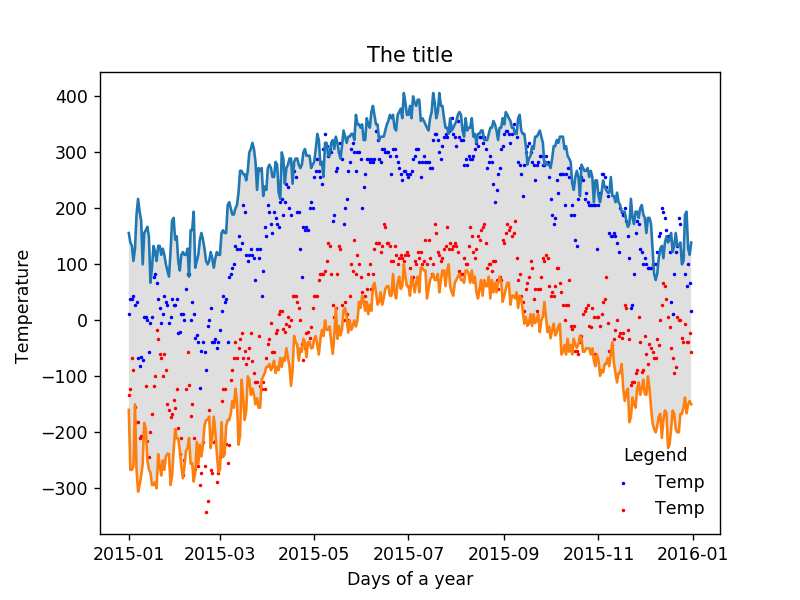

In [475]:
import pandas as pd
import numpy as np
%matplotlib notebook
import matplotlib as mpl
import numpy as np
import matplotlib.pyplot as plt
import calendar


df = pd.read_csv("fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv",parse_dates=['Date'])
# drop leap year data
df = df[~((df['Date'].dt.month == 2) & (df['Date'].dt.day == 29))]

df_2015 = df[(df['Date'].dt.year == 2015)]

df = df[~((df['Date'].dt.year < 2005) | (df['Date'].dt.year > 2014))]

max_df = df[df['Element'] == "TMAX"]
min_df = df[df['Element'] == "TMIN"]

#df.groupby([df['Date'].dt.month,df['Date'].dt.day]).groups and get max for each day group
max_values = max_df.groupby([max_df['Date'].dt.month,max_df['Date'].dt.day])['Data_Value'].agg(max)

min_values = min_df.groupby([min_df['Date'].dt.month,min_df['Date'].dt.day])['Data_Value'].agg(min)

zip_generator = zip(max_values,min_values)
temp_range = list(zip_generator)
date_rng = pd.date_range('1/1/2015','31/12/2015' ,freq='D')



plt.figure()
plt.plot(date_rng,temp_range)
plt.gca().fill_between(date_rng,max_values,min_values,facecolor='gray', alpha=0.25)


max_df_2015 = df_2015[df_2015['Element'] == "TMAX"]
min_df_2015 = df_2015[df_2015['Element'] == "TMIN"]
max_values_2015 = max_df_2015.groupby([max_df_2015['Date'].dt.month,max_df_2015['Date'].dt.day])['Data_Value'].agg(max)

min_values_2015 = min_df_2015.groupby([min_df_2015['Date'].dt.month,min_df_2015['Date'].dt.day])['Data_Value'].agg(min)

zip_generator_2015 = zip(max_values_2015,min_values_2015)
temp_range_2015 = list(zip_generator_2015)


plt.scatter(date_rng, max_values_2015, s=1, c="blue", label = "Temp")
plt.scatter(date_rng, min_values_2015, s=1, c="red", label = "Temp")

#plt.xticks( arange(12), calendar.month_name[1:13], rotation=17 )

plt.xlabel('Days of a year')
#dt_yaxis = date_rng.map(lambda x: x.strftime('%d-%m'))
plt.ylabel('Temperature ')

plt.title('High and Low Temp of 2004-2015 & Temp for 2015 ')
plt.legend(loc=4, frameon=False, title='Legend')

In [ ]:

as for "C Celsius sign on y axis" this can be done by changing the labels on the y axis

you'll nee to get the y ticks using ax.get_ytickes(), then convert the numerical
values to strings with the latex sign of degree or the unicode character 'º' the use ax.set_yticklabels() to assign the values you calculated to

In [473]:
import calendar
calendar.month_name[1:13]

['January',
 'February',
 'March',
 'April',
 'May',
 'June',
 'July',
 'August',
 'September',
 'October',
 'November',
 'December']